# **Content-based filtering** 

Welcome to my project on creating a movie recommendation system using Python! In this project, I will be using the content-based filtering approach to recommend movies to users based on their preferences.

To do this, I will be using the MovieLens dataset, which contains information about movie ratings, genres, and other features. Using this dataset, I will build a recommendation system that suggests movies to users based on the movies they have watched and liked in the past.

Let's dive in and see how we can create an effective movie recommendation system using content-based filtering!

### **How Content-Based filtering works?**

Content-based filtering is a technique that uses the features of items to recommend other similar items. In the context of movies, this means that we will be recommending movies to users based on the similarities between the features of the movies and the preferences of the users. For example: 

* If a user has rated and liked movies that are categorized as "action" and "sci-fi," then the recommendation system could suggest other movies that fall within those same genres.
* If a user has rated and liked movies with a certain actor or director, the recommendation system could suggest other movies with that same actor or director.

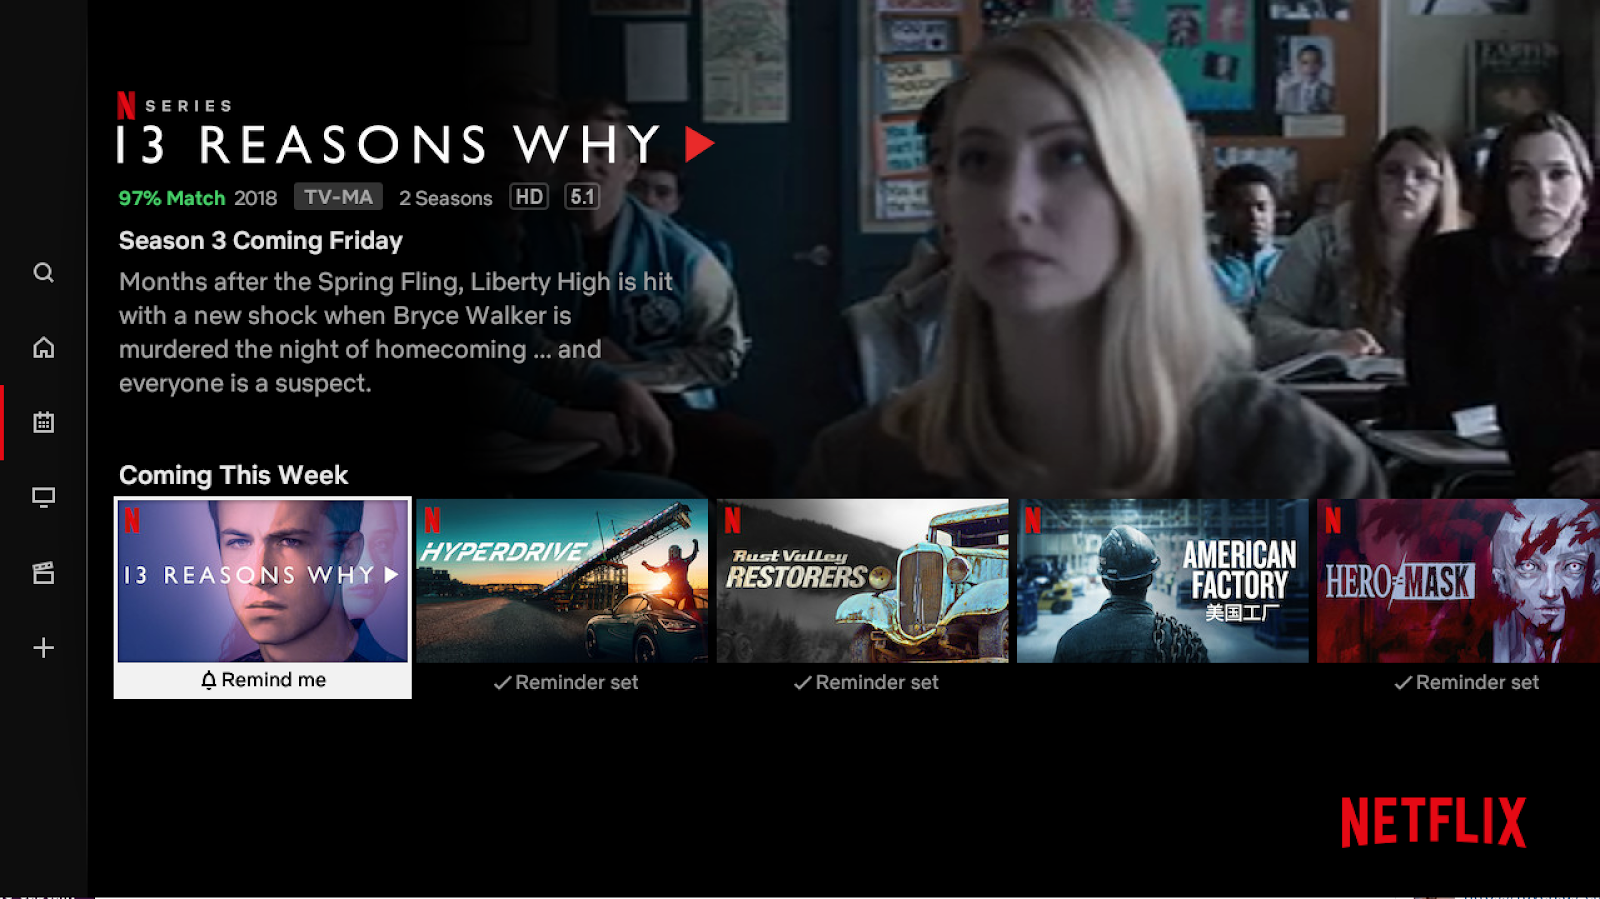

In this notebook, I will be focusing exclusively on content-based filtering to build a movie recommendation system. Content-based filtering is a personalized recommendation approach that utilizes the attributes of items to suggest similar items to users. By analyzing the properties and characteristics of a user's past movie choices, we can recommend movies with similar features that they are likely to enjoy. The goal of this project is to build a content-based recommendation system that can accurately recommend movies to users based on their past preferences and provide insights into how this approach can be applied to other domains.

As we progress with the analysis, we aim to answer: 

1. What are the most similar movies to a given movie, based on their content?
2. What are the most popular genres or themes among highly-rated movies?
3. Can we identify certain features or characteristics of movies that tend to be highly rated?
4. Given a user's viewing history, can we recommend movies with similar themes or content that they might enjoy?
5. Can we identify certain keywords or metadata associated with highly-rated movies, and use these to make recommendations?
6. How well does our content-based recommendation system perform compared to other methods, such as collaborative filtering or hybrid approaches?
7. How can we visualize the similarities or differences between movies based on their content, in order to gain insights into user preferences or movie trends?

Let's get started!

## **About the dataset**

The MovieLens DataSet is a widely used dataset for building Recommender Systems. This version of the dataset (1M) includes ratings of about 3,900 movies made by 6,040 users who joined MovieLens in 2000. The data was collected by GroupLens researchers over different periods, with this 1M version released in February 2003. To ensure quality, users were randomly selected for inclusion only if they had rated at least 20 movies. Each user is represented by an id, and no other information is given.

The original data are contained in three files, movies.dat, ratings.dat and users.dat, but I converted them into csv files to make them easier to work with. You can see the conversion process in my Data Processing Notebook

## **Loading the data**

Let's begin loading the data with Pandas onto Dataframes ratings, users, and movies. Be aware that I already pre-processed the column names, you can check the full description in the README file and in the Data_Preprocessing notebook.



In [3]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Reading ratings file
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating']) # Ignoring timestamp
# Reading users file
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])
# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

Once the data is already loaded, we can take a look at it.

## **Movies Dataset**

In [2]:
# Check first 5 rows of movies
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Check the file information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genres    3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


This is a Pandas DataFrame containing information on 3883 movies. It has 3 columns: movie_id, title, and genres. The movie_id is a unique identifier for each movie, the title column contains the name of the movie, and the genres column lists the genres associated with the movie. All columns have non-null values, and the data types of the columns are int64 for movie_id and object for title and genres.

## **Ratings Dataset**

In [4]:
# Check first 5 rows of ratings
ratings.head(5)

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [5]:
# Check the file information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   user_id   1000209 non-null  int64
 1   movie_id  1000209 non-null  int64
 2   rating    1000209 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


This is a Pandas DataFrame with 1000209 entries and 3 columns. The columns are 'user_id', 'movie_id', and 'rating', all of which contain integer data. There are no missing values in this DataFrame. The memory usage of this DataFrame is 22.9 MB.

## **Users Dataset**

In [6]:
# Check first 5 rows of ratings
users.head(5)

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [7]:
# Check the file information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   6040 non-null   int64 
 1   gender    6040 non-null   object
 2   zipcode   6040 non-null   object
 3   age_desc  6040 non-null   object
 4   occ_desc  6040 non-null   object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB


This is a pandas DataFrame with 6040 entries and 5 columns: user_id, gender, zipcode, age_desc, and occ_desc. All columns have non-null values.

## **Exploratory Data Analysis**

#### 1. Check the number of unique movie genres and identify the most common genres.


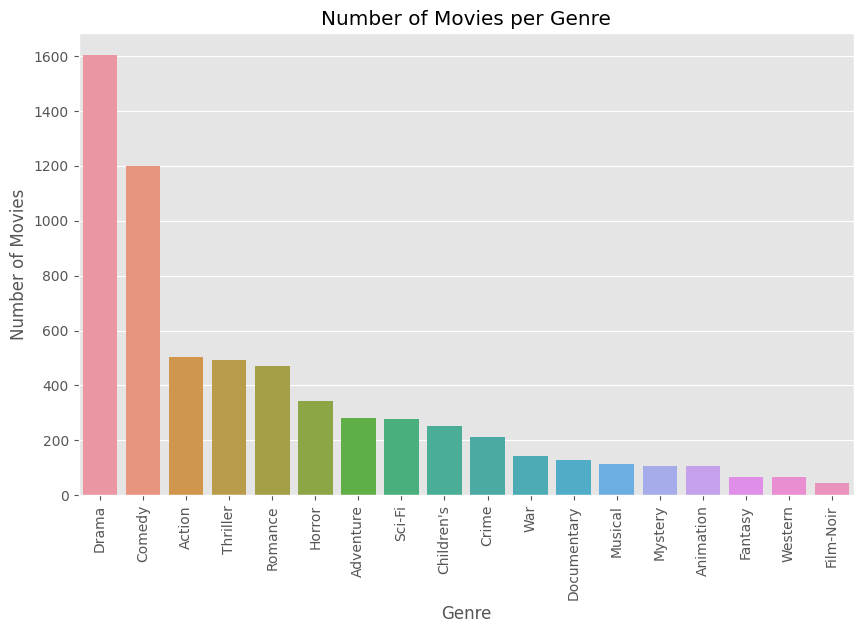

In [8]:
# split the genres into a list of genres
temp = movies.copy()
temp['genres'] = temp['genres'].str.split('|')

# create a new dataframe with the genres column expanded
genres_df = temp.explode('genres')

# count the number of movies in each genre
genre_counts = genres_df['genres'].value_counts()

# plot the genre counts in a bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values)
ax.set_title("Number of Movies per Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Number of Movies")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

## **Findings**
* Drama and Comedy are the two most common genres in the dataset, with over 1600 and 1200 movies, respectively.
* The next most common genres, Action, Thriller, Romance, Horror, Adventure, and Sci-Fi, have between 276 and 503 movies each, indicating a wide variety of popular movie genres.
* Children's, Crime, War, Documentary, Musical, Mystery, Animation, Fantasy, Western, and Film-Noir are less common genres in the dataset, each with less than 250 movies.

There is a clear imbalance in the representation of different genres in the dataset, with some genres being significantly more common than others. This is important to keep in mind when performing analyses or drawing conclusions from the data.

#### 2. Check the distribution of movie titles by year or decade.


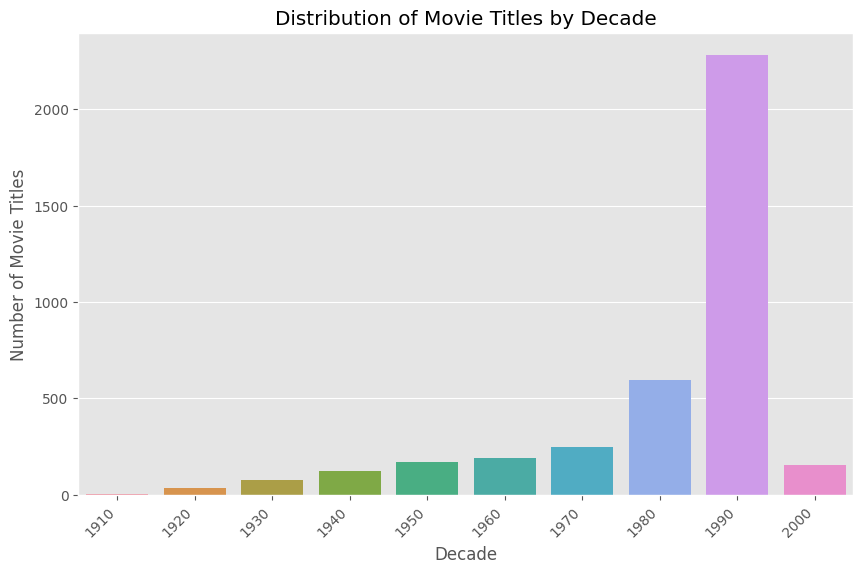

In [9]:
temp_2 = movies.copy()

# extract year from title and create a new column
temp_2['year'] = temp_2['title'].str.extract('\((\d{4})\)', expand=False)

# convert year column to numeric type
temp_2['year'] = pd.to_numeric(temp_2['year'])

# check distribution of movie titles by decade
temp_2['decade'] = (temp_2['year'] // 10) * 10
movie_counts = temp_2['decade'].value_counts().sort_index()

# plot the count of movie titles by decade
plt.figure(figsize=(10,6))
ax = sns.countplot(x='decade', data=temp_2)
ax.set_title("Distribution of Movie Titles by Decade")
ax.set_xlabel("Decade")
ax.set_ylabel("Number of Movie Titles")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

## **Findings**
* The number of movies released per decade has increased over time, with a significant increase in the 1980s and 1990s. This may be due to the growth of the movie industry and the increasing popularity of movies as a form of entertainment.

* The number of movies released during the 1910s, 1920s, and 1930s is much lower compared to the later decades. This may be due to the limited technology and resources available at the time, as well as the fact that movies were not yet a mainstream form of entertainment.

* The 2000s had the lowest number of movies released compared to other decades in the dataset. This may be due to the fact that the dataset only goes up to the year 2000, so the number of movies released in the latter half of the decade is not accounted for. Additionally, this could be a result of changes in the movie industry during this time, such as the rise of streaming services and changes in consumer preferences.

#### 3. Create a Word Cloud to visualize the most common words in the movie titles

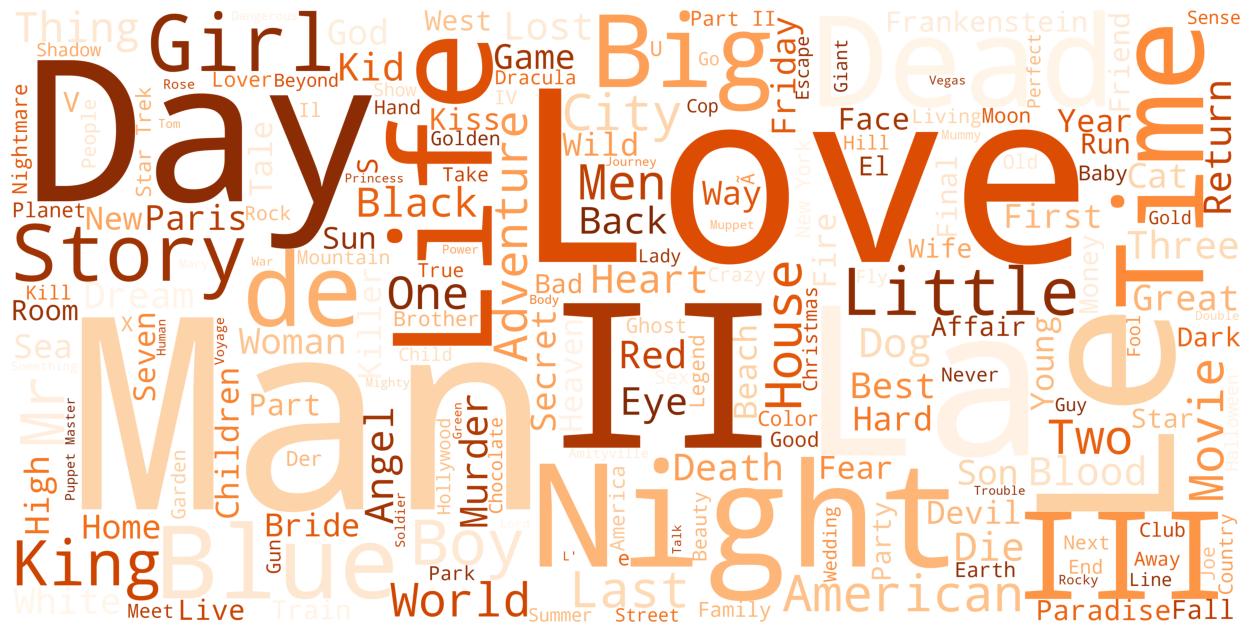

In [10]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000, colormap='Oranges').generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()


## **Insights**
* "Man" is a very common word in movie titles, appearing in 77 of them. This could suggest that movies with male protagonists are popular or have a higher chance of being produced than those with female protagonists.
* "Love" is another popular word in movie titles, appearing in 62 of them. This suggests that love stories or romantic movies are also very popular among movie-goers.
* "II" is a roman numeral indicating the second installment of a movie series or a sequel. This suggests that sequels or franchise movies are common.
* "Day" and "Night" appears in 77 movie titles, which could indicate that movies with a temporal theme or a particular day (e.g. Valentine's Day) are popular. 

It's important to note that these insights are based solely on the frequency of words in movie titles and further analysis may be needed to draw more conclusive insights.





# **Ratings**

We will see what the data tells us about the ratings of the movies, we will verify the average of the ratings to see what people value in the movies.

In [15]:
# Summary Statistics
ratings.describe()

,user_id,movie_id,rating
count,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00
std,1.728413e+03,1.096041e+03,1.117102e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.506000e+03,1.030000e+03,3.000000e+00
50%,3.070000e+03,1.835000e+03,4.000000e+00
75%,4.476000e+03,2.770000e+03,4.000000e+00
max,6.040000e+03,3.952000e+03,5.000000e+00


<AxesSubplot:xlabel='rating', ylabel='count'>

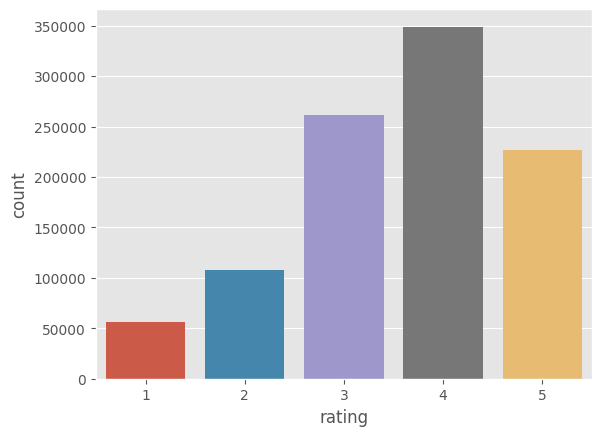

In [27]:
sns.countplot(x='rating', data=ratings.fillna(ratings.mean()))


Apparently the majority of the ratings are between 3 and 5 stars. The average of ratings is 3.75. The results seem to suggest that people tend to give very optimistic ratings to movies, so this is not always a good indicator when recommending a movie to another user.

## **Quantifying Similarity: Cosine Similarity**

Imagining that two users have similar tastes (similar ratings) for a movie, a relationship can be established between both scores which are represented as vectors, however, we do not use the Euclidean distance (Figure 1), but we use the cosine of the angle (Angular Distance) to measure how far apart M1 is from M2.

There are two options for measuring this distance:
* 1st approach: Cosine distance
* 2nd approach: Pearson correlation

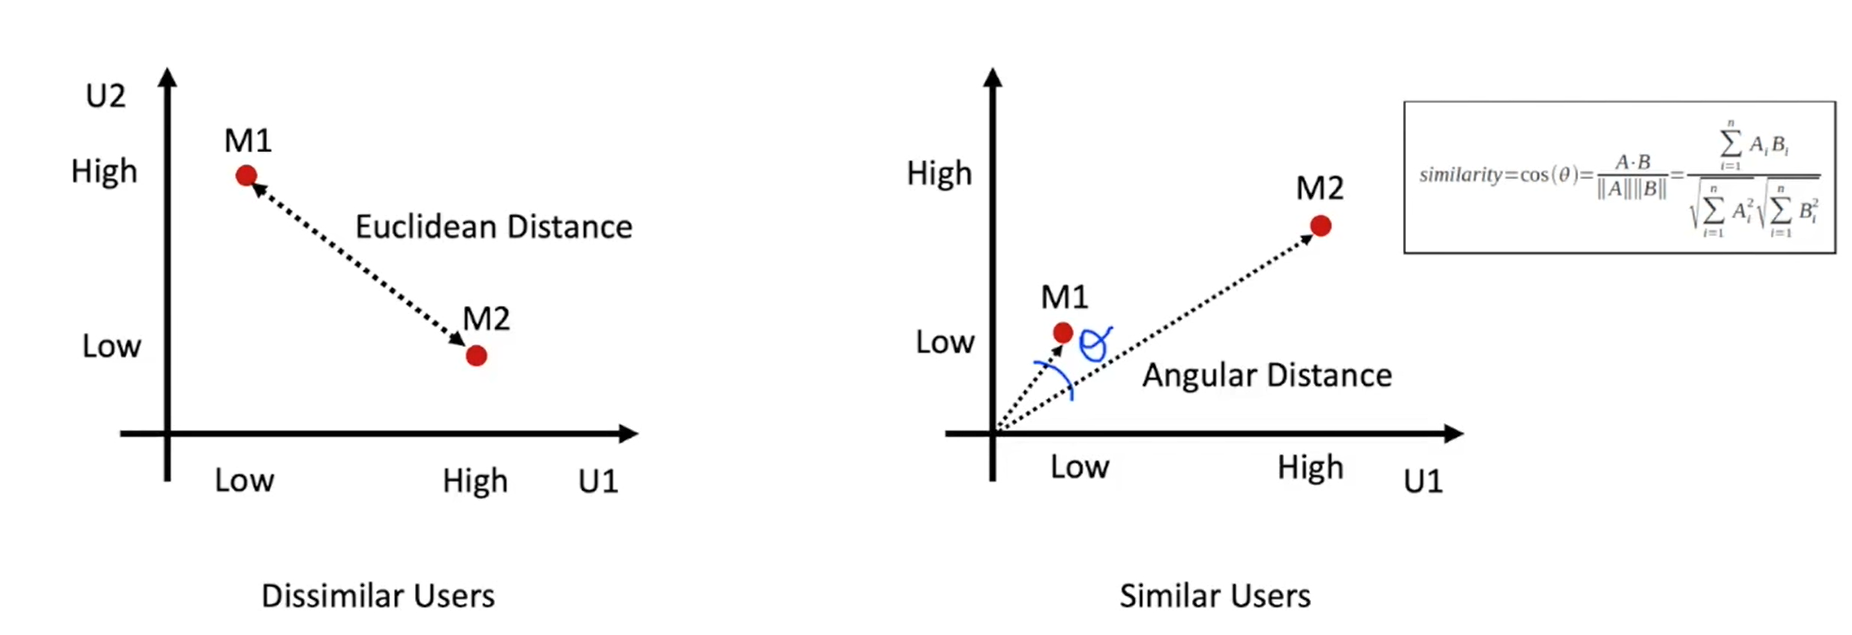

Let's apply these concepts to our dataset Movies:

In [50]:
# Additional library 
"""This function cleans the title of a movie by removing the year and any other information in parentheses or brackets"""
import re 
def clean_title(title):
    title = re.sub("[^a-zA-Z0-9 ]", "", title)
    return title

In [51]:
# Creating a new column with the clean title
movies['clean_title'] = movies['title'].apply(clean_title)
movies.tail()

,movie_id,title,genres,clean_title
3878,3948,Meet the Parents (2000),Comedy,Meet the Parents 2000
3879,3949,Requiem for a Dream (2000),Drama,Requiem for a Dream 2000
3880,3950,Tigerland (2000),Drama,Tigerland 2000
3881,3951,Two Family House (2000),Drama,Two Family House 2000
3882,3952,"Contender, The (2000)",Drama|Thriller,Contender The 2000


## **TfidVectorizer and Term Frequency**

The TfidfVectorizer is used to convert the text data in the "clean_title" column of the movies dataset into a matrix of TF-IDF features. The cosine_similarity function from scikit-learn's metrics module is then used to compute the similarity between the query vector (which represents the user's search query) and the TF-IDF feature matrix of the movie titles.

Term frequency (TF) refers to the number of times a term (word) appears in a document. The TfidfVectorizer calculates the importance of a term in a document or a collection of documents using a measure called TF-IDF (Term Frequency-Inverse Document Frequency), which takes into account the frequency of the term in the document and the rarity of the term in the collection. The TF-IDF score is higher for terms that appear frequently in a document but rarely in the collection, indicating that they are more important for distinguishing between documents.

Let's convert the data into a matrix: 

## **Creating the Recommendation System**

In [52]:
# Library for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# Turning numbers into words
vectorizer = TfidfVectorizer(ngram_range=(1,2))
# Use the vectorizer to create a matrix of word vectors
tfidf = vectorizer.fit_transform(movies['clean_title'])

Now we can look at the similarity: 

In [53]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

"""This function searches for the most similar movies to a given title"""
def search(title):
    title = clean_title(title)
    query_vec = vectorizer.transform([title])
    similarity = cosine_similarity(query_vec, tfidf).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies.iloc[indices].iloc[::-1]
    
    return results

In [55]:
# Creating an interactive search notebook
import ipywidgets as widgets
from IPython.display import display

movie_input = widgets.Text(
    value='',
    description='Movie Title:',
    disabled=False
)
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            display(search(title))

movie_input.observe(on_type, names='value')


display(movie_input, movie_list)

Text(value='', description='Movie Title:')

Output()

## **Finding users who liked the same movie**

Let's begin by uploading the ratings dataframe:

In [58]:
# Check the file information
ratings.dtypes

user_id     int64
movie_id    int64
rating      int64
dtype: object

To complete a first analysis we will take 'Toy Story' title as an example.

In [79]:
# Set an movie ID example
movieID = 1

#def find_similar_movies(movie_id):
movie = movies[movies["movie_id"] == movieID]

In [80]:
# Find the users who rated the movie
similar_users = ratings[(ratings["movie_id"] == movieID) & (ratings["rating"] > 4)]["user_id"].unique()

In [81]:
# Find the movies that the similar users liked
similar_user_recs = ratings[(ratings["user_id"].isin(similar_users)) & (ratings["rating"] > 4)]["movie_id"]
similar_user_recs

0         1193
4         2355
6         1287
7         2804
10         595
          ... 
997755    1393
997758    1717
997773    2716
997790    2762
997806    1094
Name: movie_id, Length: 57652, dtype: int64

In [82]:
# Finding the movies that 10% of the similar users liked
similar_user_recs = similar_user_recs.value_counts() / len(similar_users)
similar_user_recs = similar_user_recs[similar_user_recs > .10]
similar_user_recs

1       1.000000
260     0.489024
3114    0.469512
1198    0.454878
1196    0.421951
          ...   
1947    0.104878
293     0.103659
2289    0.103659
377     0.101220
3897    0.101220
Name: movie_id, Length: 159, dtype: float64

Now we can find how much all users like certain movies:

In [86]:
# Finding persons who highly rated the movie in the similar_user_recs list
all_users = ratings[(ratings["movie_id"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]

In [88]:
# Find the percentage of users who recommend the movie
all_user_recs = all_users["movie_id"].value_counts() / len(all_users["user_id"].unique())
all_user_recs


2858    0.331084
260     0.307978
1198    0.252994
1196    0.250126
858     0.248777
          ...   
1500    0.041491
1223    0.040816
2321    0.036600
594     0.034744
3396    0.034407
Name: movie_id, Length: 159, dtype: float64

## **Recommendation Score**

In [90]:
# Compare the percentage of similar users who recommend the movie to the percentage of all users who recommend the movie
rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
rec_percentages.columns = ["similar", "all"]
rec_percentages

,similar,all
1,1.000000,0.138303
260,0.489024,0.307978
3114,0.469512,0.122112
1198,0.454878,0.252994
1196,0.421951,0.250126
...,...,...
1947,0.104878,0.051442
293,0.103659,0.057008
2289,0.103659,0.048912
377,0.101220,0.042334


What we are looking for in this part is the higher difference between 'similar' and 'all' series. The explanation is that we will look at recommendations that other users with similar preferences highly rated a movie vs how much the average person liked them.   

In [91]:
# Score the movies based on the percentage of similar users who recommend the movie to the percentage of all users who recommend the movie
rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]

In [92]:
# Sort the movies by the score
rec_percentages = rec_percentages.sort_values("score", ascending=False)

In [94]:
# Merge the movie titles with the recommendations
rec_percentages.head(10).merge(movies, left_index=True, right_on="movie_id")

,similar,all,score,movie_id,title,genres,clean_title
0,1.000000,0.138303,7.230488,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story 1995
584,0.208537,0.053803,3.875904,588,Aladdin (1992),Animation|Children's|Comedy|Musical,Aladdin 1992
3045,0.469512,0.122112,3.844942,3114,Toy Story 2 (1999),Animation|Children's|Comedy,Toy Story 2 1999
2286,0.242683,0.066453,3.651947,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy,Bugs Life A 1998
360,0.185366,0.052623,3.522545,364,"Lion King, The (1994)",Animation|Children's|Musical,Lion King The 1994
591,0.202439,0.058189,3.479017,595,Beauty and the Beast (1991),Animation|Children's|Musical,Beauty and the Beast 1991
3327,0.113415,0.034407,3.296252,3396,"Muppet Movie, The (1979)",Children's|Comedy,Muppet Movie The 1979
2692,0.128049,0.041491,3.086184,2761,"Iron Giant, The (1999)",Animation|Children's,Iron Giant The 1999
2012,0.135366,0.044021,3.075035,2081,"Little Mermaid, The (1989)",Animation|Children's|Comedy|Musical|Romance,Little Mermaid The 1989
590,0.106098,0.034744,3.053653,594,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,Snow White and the Seven Dwarfs 1937


## **First Impressions** 
* The algorithm appears to have done a good job of recommending movies that are similar to "Toy Story".
* The top recommended movie is "Toy Story 1995" with a perfect score of 1.0, which indicates that it is the most similar movie to "Toy Story".
* The other recommended movies are also in the same genre of "Animation", "Children's", and "Comedy", which suggests that the algorithm is doing a good job of identifying movies that have similar genres to "Toy Story".
* The algorithm seems to be favoring movies that are more recent (i.e., released in the 1990s and 2000s), as the top recommended movies were all released within this time frame.
* It's possible that the algorithm is not taking into account other factors such as the plot, actors, or director of the movies, which could potentially result in less diverse recommendations.

Overall, the output suggests that the recommendator is working well for this input, but further testing with different inputs and evaluation metrics would be necessary to determine its overall effectiveness.

Now we can create the final version of this first recommendation system: 

In [104]:
movies

,movie_id,title,genres,clean_title
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale 1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II 1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,Meet the Parents 2000
3879,3949,Requiem for a Dream (2000),Drama,Requiem for a Dream 2000
3880,3950,Tigerland (2000),Drama,Tigerland 2000
3881,3951,Two Family House (2000),Drama,Two Family House 2000


In [109]:
"""This function finds the most similar movies to a given movie ID"""
def find_similar_movies(movieID):
    similar_users = ratings[(ratings["movie_id"] == movieID) & (ratings["rating"] > 4)]["user_id"].unique()
    similar_user_recs = ratings[(ratings["user_id"].isin(similar_users)) & (ratings["rating"] > 4)]["movie_id"]
    similar_user_recs = similar_user_recs.value_counts() / len(similar_users)

    similar_user_recs = similar_user_recs[similar_user_recs > .10]
    all_users = ratings[(ratings["movie_id"].isin(similar_user_recs.index)) & (ratings["rating"] > 4)]
    all_user_recs = all_users["movie_id"].value_counts() / len(all_users["user_id"].unique())
    rec_percentages = pd.concat([similar_user_recs, all_user_recs], axis=1)
    rec_percentages.columns = ["similar", "all"]    
    
    rec_percentages["score"] = rec_percentages["similar"] / rec_percentages["all"]
    rec_percentages = rec_percentages.sort_values("score", ascending=False)
    return rec_percentages.head(10).merge(movies, left_index=True, right_on="movie_id")[["score", "title", "genres"]]


In [111]:
""" This function creates an interactive search notebook"""
import ipywidgets as widgets
from IPython.display import display

movie_name_input = widgets.Text(
    value='',
    description='Movie Title:',
    disabled=False
)
recommendation_list = widgets.Output()

def on_type(data):
    with recommendation_list:
        recommendation_list.clear_output()
        title = data["new"]
        if len(title) > 5:
            results = search(title)
            movieID = results.iloc[0]["movie_id"]
            display(find_similar_movies(movieID))

movie_name_input.observe(on_type, names='value')

display(movie_name_input, recommendation_list)

Text(value='Toy Story', description='Movie Title:')

Output()